<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/2.%20Machine%20Learning/Semana%203%20-%20Classification%20Models/Semana_3_Ejercicio_Desafio_KNN_de_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay




In [3]:
filename = "/content/drive/MyDrive/Data CodingDojo/abalones/abalone data.data"
df = pd.read_csv(filename)
df.head()


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
df.columns = ["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df["Sex"].value_counts()

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

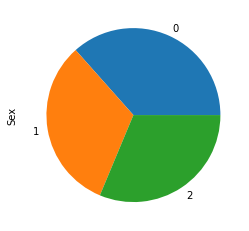

In [12]:
df["Sex"].value_counts(normalize=True).plot(kind="pie")

In [8]:
df["Sex"] = df["Sex"].replace({"M":0,"I":1,"F":2})

train test split

In [13]:
X = df.drop("Sex", axis=1)
y = df["Sex"]
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=42)

instanciar escalador

In [14]:
scaler = StandardScaler()

instanciar modelo KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=70) #n_neightbors=5 por defecto

In [25]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 70,
 'p': 2,
 'weights': 'uniform'}

scaler y modelo en pipeline y ajustar

In [27]:
knn_pipe = make_pipeline(scaler,knn)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=70))])

predecir valores

In [17]:
predictions = knn_pipe.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 2, 2])

Evaluacion

In [28]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.5718390804597702

In [19]:
# score por defecto
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.5325670498084292

In [23]:
score_x = []
for x in range(70,100):
  knn = KNeighborsClassifier(n_neighbors=x) #n_neightbors=5 por defecto
  knn_pipe = make_pipeline(scaler,knn)
  knn_pipe.fit(X_train,y_train)
  acc_score = knn_pipe.score(X_test, y_test)
  score_x.append(acc_score)
score_x

[0.5718390804597702,
 0.5651340996168582,
 0.5680076628352491,
 0.5593869731800766,
 0.5680076628352491,
 0.5613026819923371,
 0.5632183908045977,
 0.5622605363984674,
 0.5622605363984674,
 0.5651340996168582,
 0.5622605363984674,
 0.5593869731800766,
 0.5565134099616859,
 0.5565134099616859,
 0.5517241379310345,
 0.5545977011494253,
 0.5593869731800766,
 0.553639846743295,
 0.5603448275862069,
 0.5613026819923371,
 0.5584291187739464,
 0.5584291187739464,
 0.553639846743295,
 0.5507662835249042,
 0.5565134099616859,
 0.5593869731800766,
 0.5517241379310345,
 0.5517241379310345,
 0.5517241379310345,
 0.5507662835249042]

1. Es el conjunto de datos balanceado?
Con value counts se peude apreciar cifras similares con respecto al sexo, con una leve mayoria macho.
Si esta balanceado

In [ ]:
df["Sex"].value_counts()

0    1527
1    1342
2    1307
Name: Sex, dtype: int64



2. Asegúrense de escalar los datos (intenten usar el pipeline)

- Hecho


3. ¿Cuál es la exactitud del modelo por defecto?.

In [29]:
acc_score*100

57.18390804597702

4. Mediante bucle for, y dentro de los primeros 100. 
se detecta que con el valor n_neighbors = 70 se obtiene el mejor resultado
- 0.5718390804597702

# 5. Creen una matriz de confusión para el modelo KNN óptimo. 

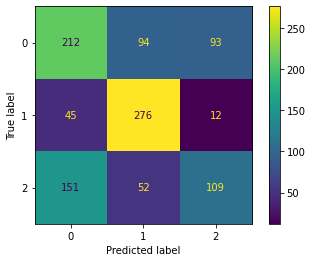

In [31]:
knn_x = KNeighborsClassifier(n_neighbors=70) #n_neightbors=5 por defecto
knn_x_pipe = make_pipeline(scaler,knn_x)
knn_x_pipe.fit(X_train,y_train)
predictions_x = knn_x_pipe.predict(X_test)
acc_score_x = knn_x_pipe.score(X_test, y_test)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

knn_cm = confusion_matrix(y_test,predictions_x,labels=knn_x.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_x.classes_)
disp.plot()

In [32]:
acc_score_x

0.5718390804597702